# Convolution Neural Network for image classification

- CNNs are one type of ANN which utilize the neuron, kernel, activation function.
- Inputs must be in images (or assumed to be images)
- Using Forward & Backpropagation technique with certain property to process it faster
- CNNs best for object detection, image classification, computer vision

## Architecture of CNNs


![image](https://user-images.githubusercontent.com/43855029/129789560-452539b8-06c7-4a3b-8543-c2f6e5a6f9c6.png)
[Source](http://henrysprojects.net/projects/conv-net.html)

- A basic CNNs consists of Convolution Layers, Max Pooling Layers and fully connected Layer (Dense) before output layer
- A simple image can be simply flatten into 1D vector and driven through the regular fully connected NN. However, this requires lot of computational power if the image is large and has more color.
- Therefore, Convolution Layers and  Max Pooling

### Convolutional Layer (CNN or ConvNet)

- Take a look at the simple gray scale image below which contains 10 pixels on width & height. The color scale has only 2 values (black & white) or (binary -1 and 1), there fore the size of the following image is 10x10x1:

![image](https://user-images.githubusercontent.com/43855029/129790068-408bbad8-8752-4153-9ce3-9099cae1995a.png)

- However, regular image contains colors [RGB](https://www.rapidtables.com/web/color/RGB_Color.html) with each color scale ranges from 0-255, making the size of each image is: n x n x 3 (n = number of pixel).

![image](https://user-images.githubusercontent.com/43855029/129623983-173558ba-45f5-4a42-972d-a6252f7695e0.png)

- CNN uses the Convolved Feature to reduce the image size by dot product with given kernel.
- The image reduction without losing features and easier to process for good prediction

![image](https://user-images.githubusercontent.com/43855029/129624312-db0f2ce1-4767-4a18-9a02-f5cee4c6cfe5.png)

- So for 3 channel RGB colors, the image size have been reduced:

![image](https://user-images.githubusercontent.com/43855029/129624564-96d6d7e4-6409-4775-ad9d-2bf133fa0396.png)

- In other word, the convoluted image from RGB image would look like:

![image](https://user-images.githubusercontent.com/43855029/129791297-fae899e5-1745-4fa0-b348-1785dea769ea.png)


### Pooling Layer
- Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature.
- This is to decrease the computational power required to process the data through dimensionality reduction
- Two types of Pooling: Max Pooling & Average Pooling.

![image](https://user-images.githubusercontent.com/43855029/129624678-75532145-0e90-48d5-9703-c8ee626aa7f4.png)

In which Max Pooling performs a lot better than Average Pooling.

- The image after Max Pooling layer would look like:

![image](https://user-images.githubusercontent.com/43855029/129791581-5d9fa47d-1390-44c2-b86a-f66273a9f7ca.png)


### Flatten Layer
- Once the images have passed through Convolution Layer and Pooling Layer, its size has been reduced greatly and ready for MLP training (or to another Convolution steps).
- The image is then flatten to a column vector and passed through feed-forward NN and BackPropagation applied to every iteration.
- Softmax activation function is applied to classified the multi-output

More information can be found [here](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)




## The CIFAR10 database
- CIFAR stands for Canadian Institute For Advanced Research
- The [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) database consisting 60,000 color images with 10 different classes
- Each image has 32 x 32 pixels with color range from 0-255
- It is good database for pattern recognition and image classification task (the entire data is clean and ready for use).
- The dataset was divided into 50,000 images for training and 10,000 images for testing
- The 10 [classes](https://keras.io/api/datasets/cifar10/) are **airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck**
- Sample CIFAR10 data:

![image](https://user-images.githubusercontent.com/43855029/134049153-99879363-c761-4b1d-b378-78186024bb95.png)[Source](https://www.cs.toronto.edu/~kriz/cifar.html)

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical

### Import convolution, max pooling and flatten as mentioned above:


In [2]:
from tensorflow.keras.layers import Conv2D # convolutional layers to reduce image size
from tensorflow.keras.layers import MaxPooling2D # Max pooling layers to further reduce image size
from tensorflow.keras.layers import Flatten # flatten data from 2D to column for Dense layer

### Load CIFAR10 data


In [3]:
from tensorflow.keras.datasets import cifar10

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalized data to range (0, 1):
X_train, X_test = X_train/X_train.max(), X_test/X_test.max()


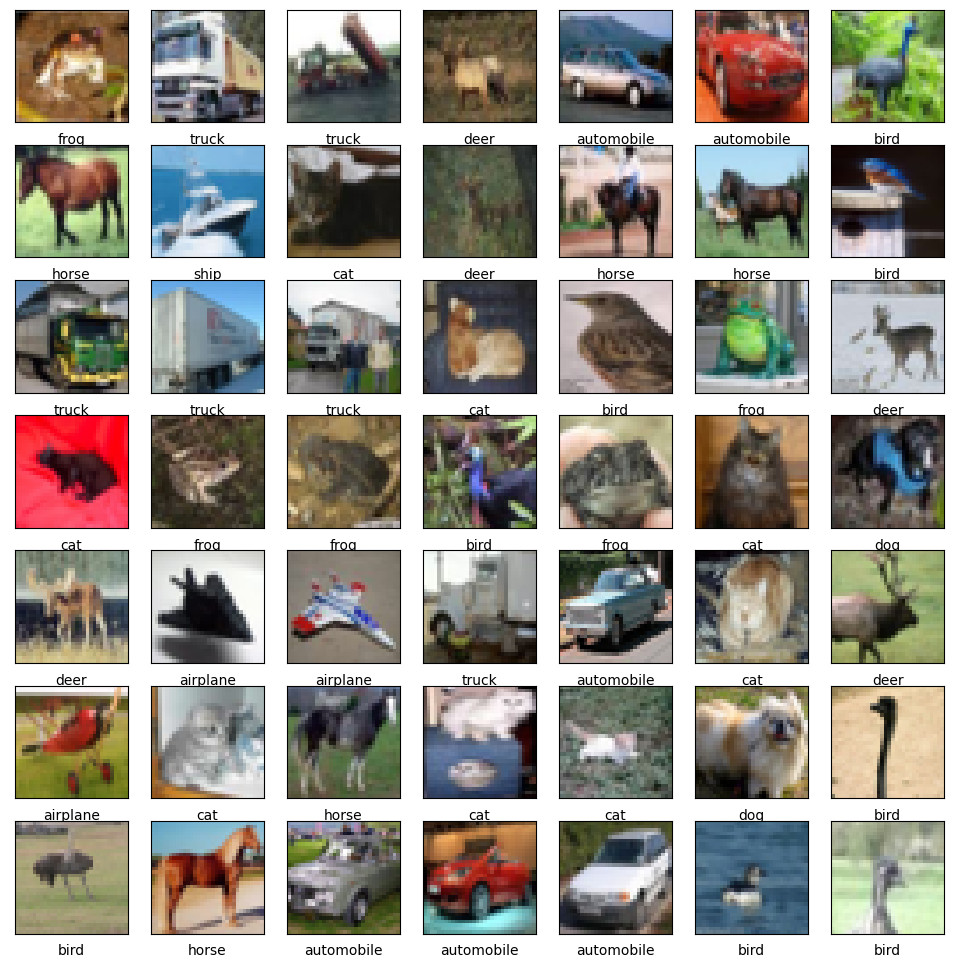

In [7]:
# Sample ploting:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, which is why you need the extra index    
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


### Using One Hot Encoding from Keras to convert the label:



In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Construct Convolutional Neural Network
- For Convolution front end, starting with kernel size (3,3) with a number of filter 10 followed by Max Pooling Layer with pool_size = (2,2).
- The 2D data after two Max Pooling layer is flatten directly.


In [10]:
model = Sequential()
model.add(Conv2D(10, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
#Output layer contains 10 different number from 0-9
model.add(Dense(10, activation='softmax'))

model.summary()
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])       

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 10)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2250)              0         
                                                                 
 dense (Dense)               (None, 100)               225100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 226,390
Trainable params: 226,390
Non-trainable params: 0
__________________________________________________

2022-10-04 12:03:11.250859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 12:03:11.969499: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30987 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:16:00.0, compute capability: 7.0


### Train model
Fit the model


In [11]:
model_CNN = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10


2022-10-04 12:03:18.242943: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


1563/1563 [==============================] - 6s 3ms/step - loss: 1.5351 - accuracy: 0.4511 - val_loss: 1.3451 - val_accuracy: 0.5256
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2880 - accuracy: 0.5445 - val_loss: 1.2480 - val_accuracy: 0.5611
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1848 - accuracy: 0.5840 - val_loss: 1.2270 - val_accuracy: 0.5663
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1166 - accuracy: 0.6069 - val_loss: 1.1763 - val_accuracy: 0.5874
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0579 - accuracy: 0.6297 - val_loss: 1.1921 - val_accuracy: 0.5797
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0147 - accuracy: 0.6433 - val_loss: 1.1499 - val_accuracy: 0.5987
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9775 - accuracy: 0.6566 - val_loss: 1.1782 - val_accuracy: 0.5909
Epo

Checking if your model is using GPUS?


In [12]:
!nvidia-smi

Tue Oct  4 12:06:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:16:00.0 Off |                    0 |
| N/A   32C    P0    56W / 300W |  31978MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Evaluate the output
Visualize the training/testing accuracy:


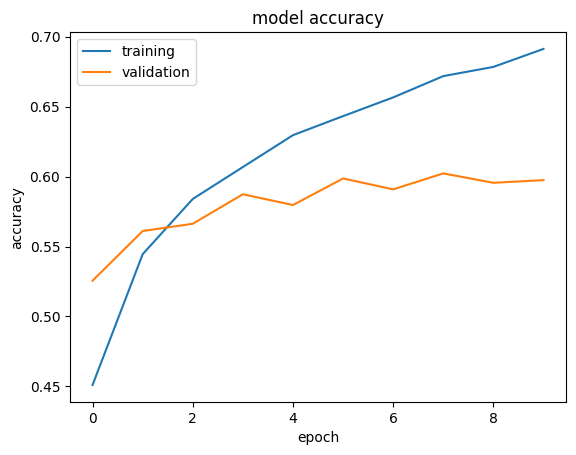

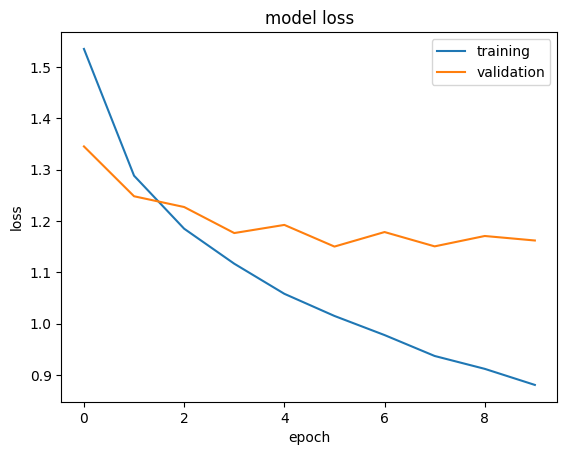

In [13]:
def plot_acc_loss(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')

    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

plot_acc_loss(model_CNN)

### Save & reload CNN model
Save model:


In [ ]:
model.save('CNN_CIFAR10.keras')


Reload model:


In [ ]:
from tensorflow import keras
model_new = keras.models.load_model('CNN_CIFAR10.keras')


### Evaluate model with testing data


In [ ]:
test_loss, test_accuracy = model_new.evaluate(X_test, y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

### Visualize the output with the first 25 testing images


In [ ]:
predictions = model_new.predict(X_test)
ypreds = np.argmax(predictions, axis=1)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.title(class_names[ypreds[i]])
plt.show()

### Improving the performance?
Use more convolution and max pooling payer:

In [8]:
model = Sequential()
model.add(Conv2D(8, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])               

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 512)       37376     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         1179904   
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               4

In [ ]:
model_CNN = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

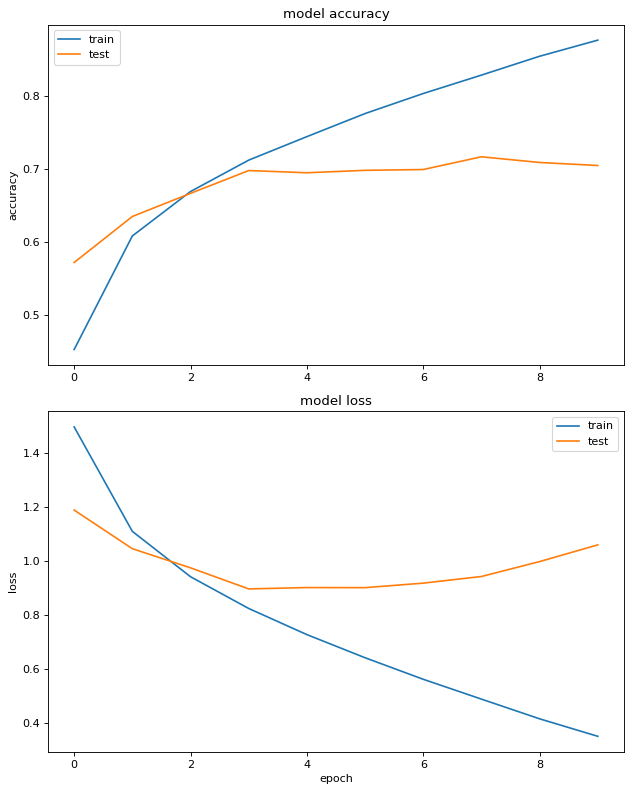

In [36]:
fig = plt.figure(figsize=(8, 10), dpi=80)
plt.subplot(2,1,1)
plt.plot(model_CNN.history['accuracy'])
plt.plot(model_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(2,1,2)
plt.plot(model_CNN.history['loss'])
plt.plot(model_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()



313/313 [==============================] - 0s 1ms/step


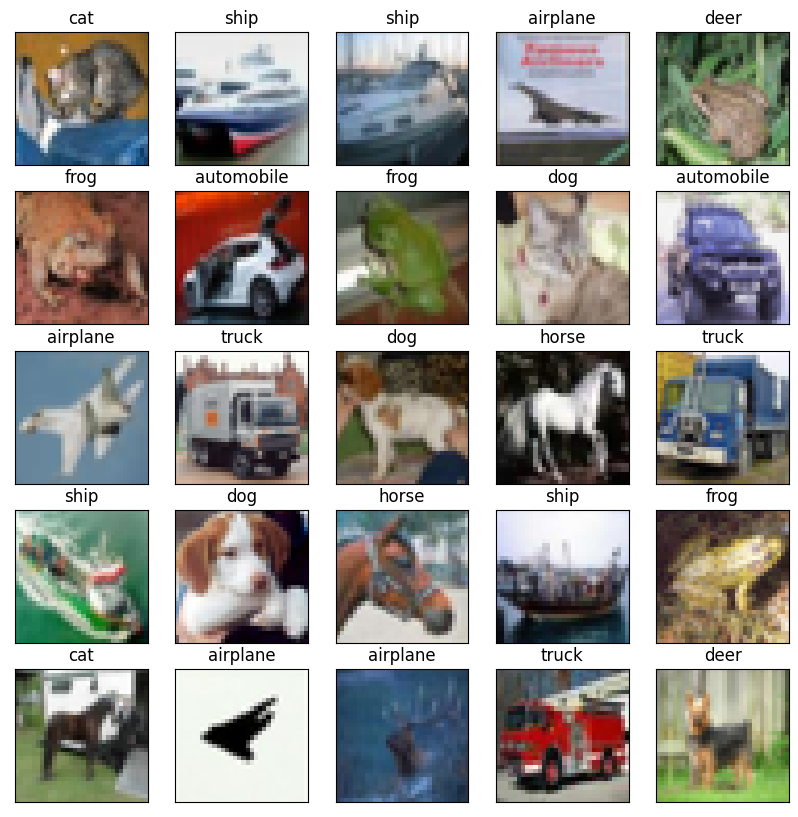

In [39]:
import numpy as np
predictions = model.predict(X_test)
ypreds = np.argmax(predictions, axis=1)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(32,32,3))
    plt.title(class_names[ypreds[i]])
plt.show()

# Loading a pre-trained model  VGG16

Many pretrained model available in [Keras](https://keras.io/api/applications/)

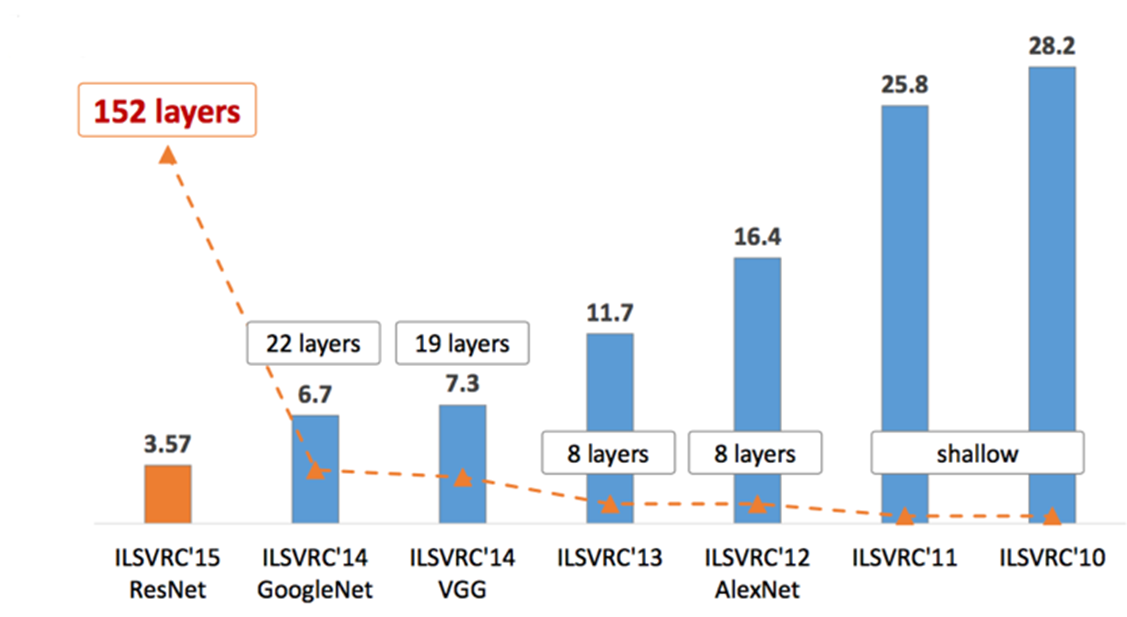

In [ ]:
from tensorflow.keras.applications import VGG16
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")
model.summary()

## Download some images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

In [ ]:
!wget https://cdn.britannica.com/29/150929-050-547070A1/lion-Kenya-Masai-Mara-National-Reserve.jpg

In [ ]:
show_image("lion-Kenya-Masai-Mara-National-Reserve.jpg")

## Processing input images to VGG16 input

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

## Prediction using VGG16

Now that we have our image in the right format, we can pass it into our model and get a prediction. We are expecting an output of an array of 1000 elements, which is going to be difficult to read. Fortunately, models loaded directly with Keras have yet another helpful method that will translate that prediction array into a more readable form.

Fill in the following function to implement the prediction:

In [ ]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

In [ ]:
readable_prediction("lion-Kenya-Masai-Mara-National-Reserve.jpg")

In [ ]:
!wget https://files.worldwildlife.org/wwfcmsprod/images/African_Elephant_Kenya_112367/story_full_width/qxyqxqjtu_WW187785.jpg

In [ ]:
readable_prediction("atchoumcrop.jpg")

In [ ]:
readable_prediction("B18FBLhCEAAuvE5.jpg")

In [ ]:
!wget https://pbs.twimg.com/media/B18FBLhCEAAuvE5?format=jpg&name=900x900

## Any other pre-trained model?
https://www.tensorflow.org/api_docs/python/tf/keras/applications

VGG16, VGG19, resnet, etc.